# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2021.12.10

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216

This data is DNA of smFISH RNA:
    \\10.245.74.158\Chromatin_NAS_6\20211216-P_brain_CTP12-RNA



In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

27256


# 0. fov parameters

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':[r'\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230',
                            r'\\10.245.74.158\Chromatin_NAS_6\20220109-CTP11-1000_CTP12-DNA_from_1230',],
             'save_folder':r'J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230_not_denoise',
             'experiment_type': 'DNA',
             'num_threads': 25,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':10,
                     'max_num_seeds': None,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }


In [105]:
_overwrite = False
#sel_fov_ids = np.arange(0, 50)
#sel_fov_ids = np.arange(0, 5) # whatever has been processed

sel_fov_ids = [15,20]

for _fov_id in sel_fov_ids:

    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True,
                                              )
    break
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                #_sel_ids=[31,33,35,36,45,49,97],
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process image into candidate spots
    #fov.parallel = True
    #fov.unique_ref_id = 0
    #fov._process_image_to_spots('unique', 
    #                            _load_common_reference=True, _load_with_multiple=False,
    #                            _save_images=True,
    #                            _warp_images=False, 
    #                            _fit_spots=True,
    #                            _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
    #                            _overwrite_spot=_overwrite,
    #                            _verbose=True)
    # 4. DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 59
- Number of field of views: 159
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 5
- Number of field of views: 160
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12', 'H62U1

# Visualize spots and images

In [106]:
fov._load_from_file('combo')
fov._load_from_file('unique')

+ loading combo from file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230_not_denoise\Conv_zscan_015.hdf5
++ finish loading combo in 0.646s. 
+ loading unique from file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230_not_denoise\Conv_zscan_015.hdf5
++ finish loading unique in 0.014s. 


<IPython.core.display.Javascript object>


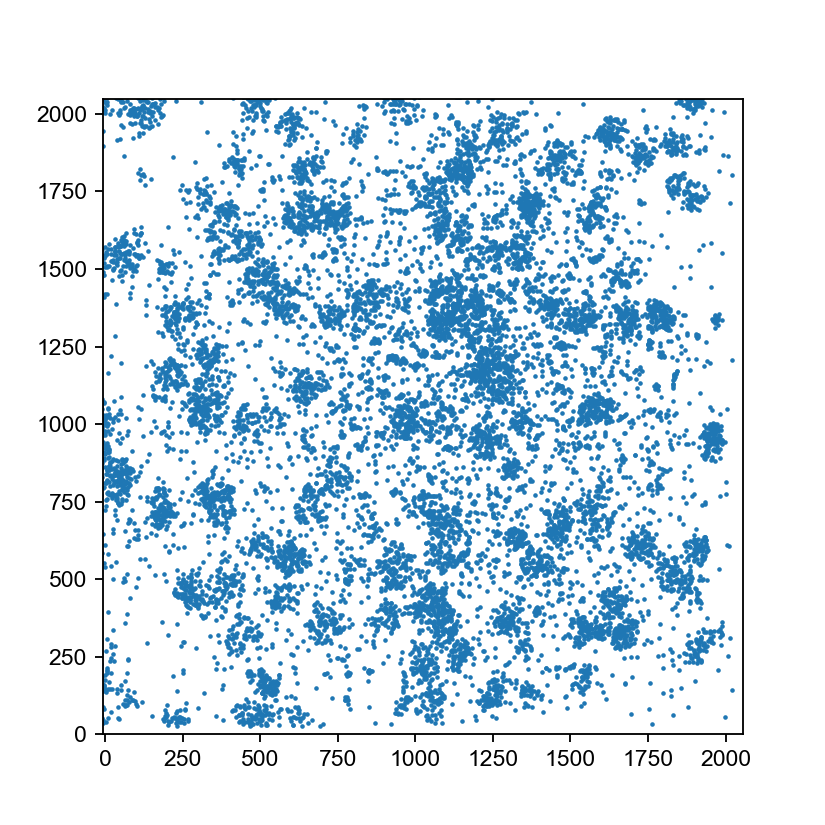

(12939, 29952)

In [107]:
plt.figure(figsize=(5,5),dpi=150)
spots = fov.combo_spots_list[3]
sel_inds = spots[:,0] > 2000
plt.scatter(spots[sel_inds,3], spots[sel_inds,2], s=1)
plt.axis('equal')
plt.xlim([0,2048])
plt.ylim([0,2048])
plt.show()
np.sum(sel_inds), len(sel_inds)

In [79]:
with h5py.File(r'J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_002.hdf5', "r", libver='latest') as _f:
    _fov_name = _f.attrs['fov_name']
    
    _grp = _f['combo']
    old_combo_ims = _grp['ims'][30:32]

In [108]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _fov_name = _f.attrs['fov_name']
    
    _grp = _f['combo']
    combo_ims = _grp['ims'][:]
    combo_spots_list = [_spots[_spots[:,0]>0] for _spots in _grp['spots'][:]]
    raw_combo_spots_list = [_spots[_spots[:,0]>0] for _spots in _grp['raw_spots'][:]]
    combo_channels = [_ch.decode() for _ch in _grp['channels'][:]]
    combo_ids = _grp['ids'][:]
    combo_drifts = _grp['drifts'][:]

In [111]:
print(fov.save_folder)

J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230_not_denoise


In [112]:
segmentation_filename = os.path.join(fov.save_folder, 'Segmentation', fov.fov_name.replace('.dax', '_Segmentation.npy'))
_mask = np.load(segmentation_filename)

<IPython.core.display.Javascript object>


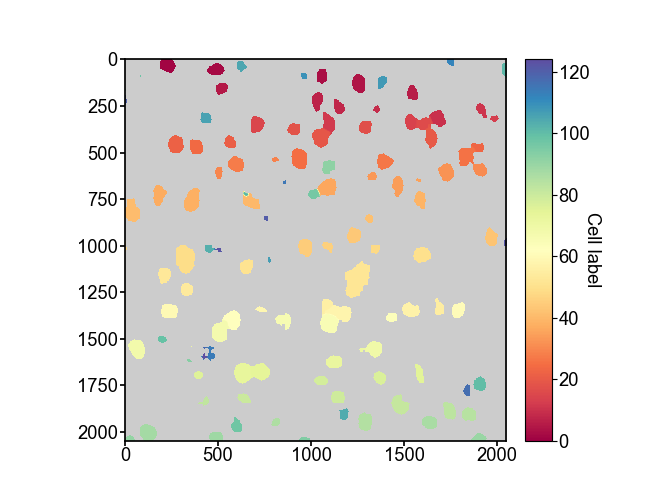

<AxesSubplot:>

In [114]:
from ImageAnalysis3.figure_tools import plot_segmentation
plot_segmentation.plot_segmentation(_mask)

In [115]:
cell_mask = np.array(_mask==25, dtype=np.uint16)

In [119]:
from ImageAnalysis3.segmentation_tools.cell import segmentation_mask_2_bounding_box
reload(cell)
_crop = segmentation_mask_2_bounding_box(cell_mask)

In [120]:
from ImageAnalysis3.classes.preprocess import Spots3D

In [121]:
raw_combo_spots_list = [Spots3D(_spots) for _spots in raw_combo_spots_list]

<IPython.core.display.Javascript object>


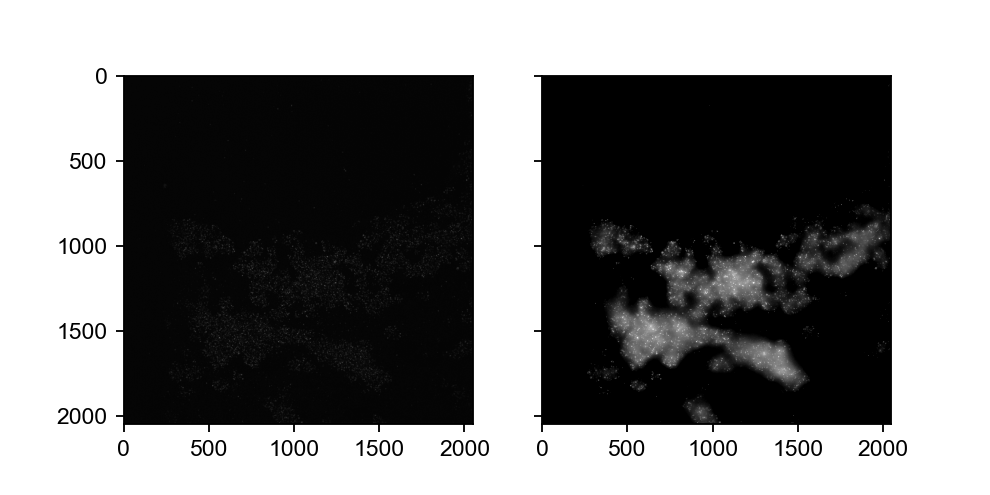

In [85]:
fig, axes = plt.subplots( 1,2,figsize=(6,3), dpi=150, sharex=True, sharey=True)
a
axes[0].imshow(old_combo_ims[0].max(0), cmap='Greys_r', vmin=0)
axes[1].imshow(combo_ims[30].max(0), cmap='Greys_r', vmin=15000, vmax=25000)

In [125]:
coord_dict = {
    'coords': [],#np.fliplr(sel_spots[:,1:4]),
    'class_ids': [],#sel_ids,
}

intensity_th = 1000

# load dict
for _i, _spots in enumerate(raw_combo_spots_list):
    _sel_inds = _crop.inside(_spots.to_coords())
    #_sel_spots = _spots[_sel_inds * (_spots.to_intensities() > intensity_th)]
    if len(_sel_spots) > 0:
        coord_dict['coords'].extend(list(np.fliplr(_spots.to_coords()[_sel_inds])))
        #coord_dict['coords'].extend(list(np.fliplr(_crop.crop_coords(_spots.to_coords()[_sel_inds]))))
        coord_dict['class_ids'].extend(list(np.ones(np.sum(_sel_inds),dtype=np.int32) * _i))
# crop image
crop_combo_ims = [_im[_crop.to_slices()] for _im in combo_ims]

<IPython.core.display.Javascript object>


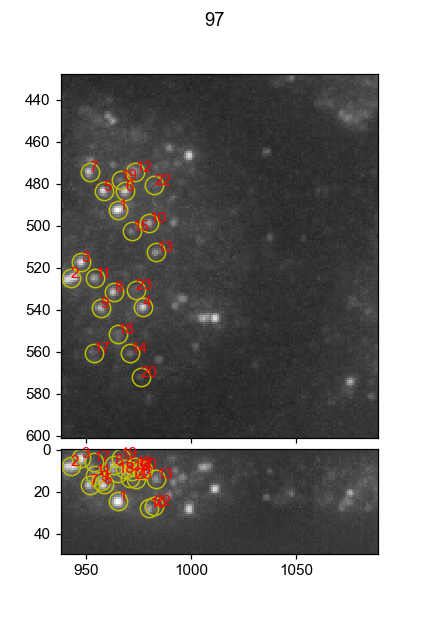

In [128]:
visual_tools.imshow_mark_3d_v2(combo_ims, given_dic=coord_dict, image_names=combo_ids)
#visual_tools.imshow_mark_3d_v2(crop_combo_ims, given_dic=coord_dict)

# Alignment from RNA

In [40]:
# load RNA class
rna_fov_param = {
    'data_folder':r'\\10.245.74.158\Chromatin_NAS_6\20211216-P_brain_CTP12-RNA',
    'save_folder':r'\\franklin\SSD_01\Pu_Temp\20211216-P_brain_CTP12-RNA',
    'experiment_type': 'RNA',
    'num_threads': 16,
    'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
    'shared_parameters':{
        'single_im_size':[50,2048,2048],
        'distance_zxy': [250, 108, 108],
        'corr_channels':['750','647'],
        'num_empty_frames': 0, 
        'num_buffer_frames':0,
        'corr_hot_pixel':True,
        'corr_Z_shift':True,
        'corr_bleed':True,
        'min_num_seeds':100,
        'max_num_seeds': None,
        'spot_seeding_th': 1500,
        'normalize_intensity_local':False,
        'normalize_intensity_background':False,
        'corr_gaussian_highpass':True,
        }, 
    }
# create rna_fov class
rna_fov = classes.field_of_view.Field_of_View(rna_fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 14
- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_6\20211216-P_brain_CTP12-RNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0R1', 'H1R2', 'H2R3', 'H3R4', 'H4R5', 'H5R6', 'H6R7', 'H7R8', 'H8R9', 'H9R10', 'H10R11', 'H11R12', 'H12R13', 'H13R14'])
- 14 folders are found according to color-usage annotation.
+ loading fov_info from file: \\franklin\SSD_01\Pu_Temp\20211216-P_brain_CTP12-RNA\Conv_zscan_029.hdf5
++ base attributes loaded:['dapi_im', 'protein_ref_im', 'rna_ref_im'] in 6.645s.
+ loading correction from file: \\franklin\SSD_01\Pu_Temp\20211216-P_brain_CTP12-RNA\Conv_zscan_029.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directl

In [42]:
dapi_im = fov._load_dapi_image()

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\H0C1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\H0C1\Conv_zscan_029.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\H0C1\Conv_zscan_029.dax  in 5.213s
-- removing hot pixels for channels:['405'] in 10.160s
-- correct Z-shifts for channels:['405'] in 8.661s
-- illumination correction for channels: 405, in 3.245s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 28.430s
-- saving fov_info to file: H:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_029.hdf5
++ base attributes saved:['dapi_im'] in 8.746s.


In [47]:
?getAffineTransform

In [48]:
reload(ia.correction_tools.alignment)

<module 'ImageAnalysis3.correction_tools.alignment' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\alignment.py'>

In [50]:
rna_align_file = r'\\10.245.74.158\Chromatin_NAS_6\20211216-P_brain_CTP12-RNA\Experiments\10x_positions_before.txt'
dna_align_file = r'\\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Alignments\10x_positions_after.txt'


In [53]:
R, t = ia.correction_tools.alignment.align_manual_points(rna_align_file, dna_align_file,
                                                         save_folder=fov.save_folder)

- Manually picked points aligned, rotation:
[[ 0.99987138  0.01603818]
 [-0.01603818  0.99987138]],
 translation:[-2132.35179369 -1145.97222401]
-- rotation matrix saved to file:H:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\rotation
-- translation matrix saved to file:H:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\translation


In [54]:
rot_dna_dapi_im, _rot, _dft = ia.correction_tools.alignment.calculate_translation(rna_fov.dapi_im, fov.dapi_im, 
                                                    R,)

-- start calculating drift with rotation between images
-- aligning image -> directly use image
-- directly use ref_image
--- drift: [-0.06 13.04 13.5 ] pixels


In [57]:
_rot, _dft

(array([[ 0.99987138,  0.01603818],
        [-0.01603818,  0.99987138]]),
 array([-0.06, 13.04, 13.5 ]))

<IPython.core.display.Javascript object>


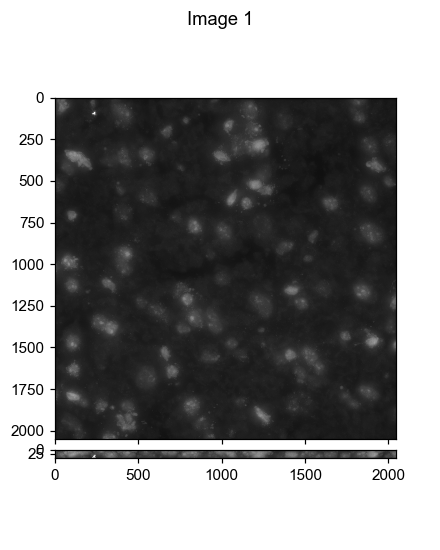

In [55]:
visual_tools.imshow_mark_3d_v2([dapi_im, rot_dna_dapi_im, rna_fov.dapi_im])